# pNEUMA

In [1]:
import os
import csv
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
import datetime as dt
from datetime import timedelta

In [5]:
#from pydmd import DMD

In [6]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [7]:
def read_csv(path):
    metadata_cols = ['track_id', 'type', 'traveled_d', 'avg_speed']
    metadata_dtypes = [int, str, float, float]
    data_cols = ['lat', 'lon', 'speed', 'lat_acc', 'lon_acc', 'time', 'track_id']
    
    metadata_colsize = len(metadata_cols)
    data_colsize = len(data_cols)-1
    
    metadata_rows = list()
    data_rows = list()
    
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        next(csv_reader)
        metadata = dict()
        for row in csv_reader:
            row = [item.strip() for item in row]
            track_id = int(row[0])
            metadata_rows.append(row[:metadata_colsize])

            data_traj = [float(item) for item in row[metadata_colsize:]
                          if len(item) > 0]
            for i in range(0,len(data_traj),data_colsize):
                data_row = data_traj[i:i+data_colsize] + [track_id]
                data_rows.append(data_row)
            
    data = pd.DataFrame(data_rows, columns=data_cols)     
    metadata = pd.DataFrame(metadata_rows, columns=metadata_cols)
    metadata = metadata.set_index('track_id')
    metadata.index = metadata.index.astype(int)
    return metadata, data

In [8]:
files = []
root = os.getcwd()
path = './data/pNEUMA/'
os.chdir(path)
for file in glob.glob("*.csv"):
    files.append(file)
    print(file)
os.chdir(root)

20181024_d1_0830_0900.csv


In [9]:
urlpath = f'{path}{file}'
urlpath

'./data/pNEUMA/20181024_d1_0830_0900.csv'

In [10]:
metadata, data = read_csv(urlpath)

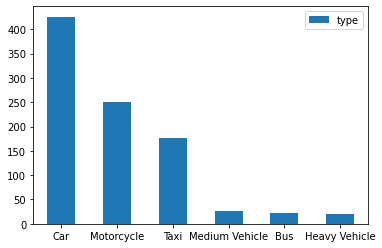

In [11]:
ax = metadata.type.value_counts(dropna=False).plot.bar(
    rot=0, legend=True)

In [12]:
df = pd.merge(metadata, data, left_index=True, right_on='track_id')
df

,type,traveled_d,avg_speed,lat,lon,speed,lat_acc,lon_acc,time,track_id
0,Car,48.85,9.770344,37.98,23.74,4.92,0.05,-0.03,0.00,1
1,Car,48.85,9.770344,37.98,23.74,4.92,-0.01,-0.04,0.04,1
2,Car,48.85,9.770344,37.98,23.74,4.92,-0.05,-0.04,0.08,1
3,Car,48.85,9.770344,37.98,23.74,4.91,-0.09,-0.05,0.12,1
4,Car,48.85,9.770344,37.98,23.74,4.89,-0.17,-0.06,0.16,1
...,...,...,...,...,...,...,...,...,...,...
1446882,Car,35.00,23.335533,37.98,23.74,21.34,-0.14,-0.07,818.64,922
1446883,Car,35.00,23.335533,37.98,23.74,21.33,-0.15,-0.06,818.68,922
1446884,Car,35.00,23.335533,37.98,23.74,21.32,-0.17,-0.06,818.72,922
1446885,Car,35.00,23.335533,37.98,23.74,21.31,-0.20,-0.06,818.76,922


In [13]:
import numpy as np

In [45]:
import movingpandas as mpd

In [46]:
import geopandas as gpd
import contextily as ctx

In [84]:
sample = df[df.track_id < 9]

In [85]:
sample['timestamp'] = sample.apply(
    lambda x: dt.datetime(2018, 10, 24, 8, 30) + timedelta(seconds=x.time),
    axis=1)

In [86]:
sample = sample.set_index('timestamp')

In [87]:
# Initialize points in ETRS89 reference system.
geolocations = gpd.GeoDataFrame(sample,
                                geometry=gpd.points_from_xy(
                                    sample.lon,
                                    sample.lat,
                                    crs={'init': 'epsg:4326'}))
geolocations.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
geolocations

,type,traveled_d,avg_speed,lat,lon,speed,lat_acc,lon_acc,time,track_id,geometry
timestamp,,,,,,,,,,,
2018-10-24 08:30:00.000,Car,48.85,9.770344,37.98,23.74,4.92,0.05,-0.03,0.00,1,POINT (23.73769 37.97739)
2018-10-24 08:30:00.040,Car,48.85,9.770344,37.98,23.74,4.92,-0.01,-0.04,0.04,1,POINT (23.73769 37.97739)
2018-10-24 08:30:00.080,Car,48.85,9.770344,37.98,23.74,4.92,-0.05,-0.04,0.08,1,POINT (23.73769 37.97739)
2018-10-24 08:30:00.120,Car,48.85,9.770344,37.98,23.74,4.91,-0.09,-0.05,0.12,1,POINT (23.73769 37.97739)
2018-10-24 08:30:00.160,Car,48.85,9.770344,37.98,23.74,4.89,-0.17,-0.06,0.16,1,POINT (23.73769 37.97739)
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-24 08:30:26.040,Car,158.21,21.739084,37.98,23.74,35.75,-0.15,0.72,26.04,8,POINT (23.73787 37.97698)
2018-10-24 08:30:26.080,Car,158.21,21.739084,37.98,23.74,35.74,-0.16,0.70,26.08,8,POINT (23.73787 37.97698)
2018-10-24 08:30:26.120,Car,158.21,21.739084,37.98,23.74,35.73,-0.16,0.67,26.12,8,POINT (23.73786 37.97698)


In [89]:
%%time
trajectories = []
for key, values in geolocations[:].groupby(['track_id']):
    try:
        trajectory = mpd.Trajectory(values, key)
        if trajectory.df.shape[0] > 1:
            trajectories.append(trajectory)
    except:
        pass

print("Finished creating {} trajectories".format(len(trajectories)))

Finished creating 8 trajectories
CPU times: user 60.1 ms, sys: 40 µs, total: 60.1 ms
Wall time: 53 ms


In [90]:
traj_collection = mpd.TrajectoryCollection(trajectories)
print(traj_collection)

TrajectoryCollection with 8 trajectories


In [91]:
trajectory = mpd.Trajectory(geolocations, traj_id='track_id')

In [92]:
traj_collection.hvplot(line_width=2,
                  tiles='CartoDark',
                  c='speed',
                  cmap='plasma',
                  colorbar=True)

:Overlay
   .Tiles.I   :Tiles   [x,y]
   .Path.I    :Path   [Longitude,Latitude]   (speed)
   .Path.II   :Path   [Longitude,Latitude]   (speed)
   .Path.III  :Path   [Longitude,Latitude]   (speed)
   .Path.IV   :Path   [Longitude,Latitude]   (speed)
   .Path.V    :Path   [Longitude,Latitude]   (speed)
   .Path.VI   :Path   [Longitude,Latitude]   (speed)
   .Path.VII  :Path   [Longitude,Latitude]   (speed)
   .Path.VIII :Path   [Longitude,Latitude]   (speed)

In [93]:
#X = sample[['lat', 'lon']]
#X = StandardScaler().fit_transform(X)
#X.shape
#db = DBSCAN(eps=, min_samples=500).fit(X)
#y = db.labels_
#qb = QuickBundles(threshold=10.)
#clusters = qb.cluster(np.array(sample[['lat', 'lon']].values))
#list(clusters)#.unique()

In [94]:
# Convert to Pseudo-Mercator for cartography.
geolocations = geolocations.to_crs(epsg=3857)
geolocations.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
# Specify maptiles source.
source = ctx.providers.CartoDB.DarkMatter

In [96]:
# Extract x, y and c from geopandas.
lat = geolocations.geometry.y
lon = geolocations.geometry.x
c = geolocations.speed

In [97]:
geolocations

,type,traveled_d,avg_speed,lat,lon,speed,lat_acc,lon_acc,time,track_id,geometry
timestamp,,,,,,,,,,,
2018-10-24 08:30:00.000,Car,48.85,9.770344,37.98,23.74,4.92,0.05,-0.03,0.00,1,POINT (2642467.341 4576232.412)
2018-10-24 08:30:00.000,Medium Vehicle,159.97,17.451502,37.98,23.74,0.00,0.00,0.00,0.00,6,POINT (2642404.111 4576339.883)
2018-10-24 08:30:00.000,Motorcycle,138.01,24.841425,37.98,23.74,0.00,0.00,0.00,0.00,5,POINT (2642402.219 4576337.341)
2018-10-24 08:30:00.000,Motorcycle,98.09,19.839417,37.98,23.74,16.98,-0.04,-0.02,0.00,2,POINT (2642435.281 4576267.859)
2018-10-24 08:30:00.000,Car,158.21,21.739084,37.98,23.74,0.00,0.00,0.00,0.00,8,POINT (2642400.660 4576350.898)
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-24 08:30:32.840,Medium Vehicle,159.97,17.451502,37.98,23.74,26.81,-0.01,-0.14,32.84,6,POINT (2642536.804 4576202.190)
2018-10-24 08:30:32.880,Medium Vehicle,159.97,17.451502,37.98,23.74,26.81,-0.01,-0.13,32.88,6,POINT (2642537.249 4576202.049)
2018-10-24 08:30:32.920,Medium Vehicle,159.97,17.451502,37.98,23.74,26.81,-0.01,-0.12,32.92,6,POINT (2642537.583 4576202.049)


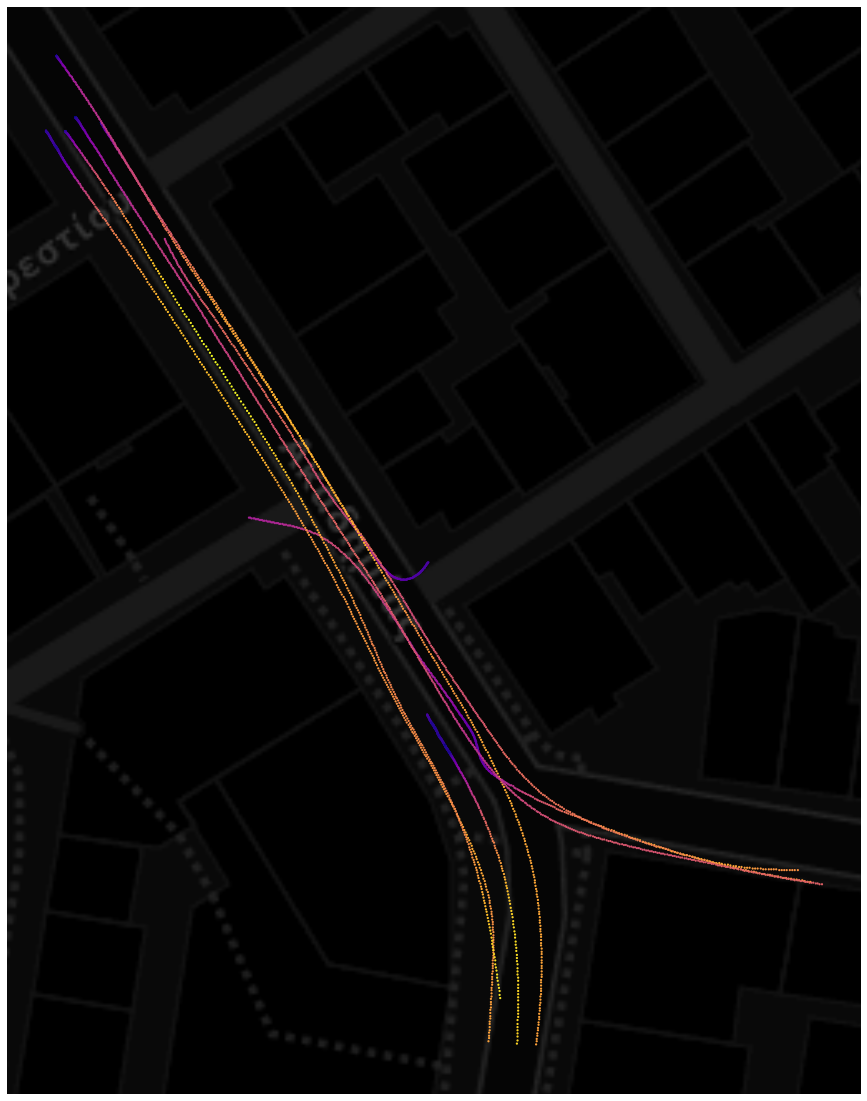

In [99]:
fig, ax = plt.subplots(figsize=(20, 20))
scatter = ax.scatter(lon,
                     lat,
                     c=c,
                     s=5,
                     ec=None,
                     cmap='plasma')
ax.set_axis_off()
ctx.add_basemap(ax, attribution=False, source=source, zoom=18)